In [1]:
from IPython.display import display, Math

In [2]:
# As seguintes librarias serão necessárias para resolver os exercícios
# O numpy permite efetuar cálculos de forma eficiente
# sobre vários números (arrays)
import numpy as np
# O matplotlib e o seu módulo pyplot oferecem
# uma interface simples para gerar gráficos
import matplotlib.pyplot as plt

In [3]:
import numpy.typing as npt
from dataclasses import dataclass
from typing import Callable


@dataclass
class EulerIntegrationResult:
    dt: float  # timestep
    t: npt.NDArray  # tempos
    y: npt.NDArray  # posições
    vy: npt.NDArray  # velocidades
    ay: npt.NDArray  # aceleração


def eulerIntegration1D(
    t0: float,  # Tempo inicial
    tf: float,  # Tempo final
    a: Callable[[float], float] = lambda _: 9.8,  # Aceleração
    dt: float = 0.01,  # timestep
    vy0: float = 0,  # velocidade inicial
    ay0: float = 9.8,  # Aceleração inicial
    y0: float = 0,  # posição inicial
) -> EulerIntegrationResult:
    duration = tf - t0

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int(duration / dt + 0.1)

    t = np.zeros(n + 1)
    y = np.zeros(n + 1)
    vy = np.zeros(n + 1)
    ay = np.zeros(n + 1)

    # Insert initial values
    ay[0] = ay0
    vy[0] = vy0
    t[0] = t0
    y[0] = y0

    for i in range(n):
        ay[i + 1] = a(ay[i])

        y[i + 1] = y[i] + vy[i] * dt
        vy[i + 1] = vy[i] + ay[i] * dt
        t[i + 1] = t[i] + dt

    return EulerIntegrationResult(dt=dt, t=t, y=y, vy=vy, ay=ay)

# Exercício 1

Um objeto pequeno é largado de uma altura elevada. Considere a queda livre, sem
resistência do ar. Considere $g = 9.80 \; \text{m/s}$


In [4]:
g = 9.8

a) Qual a relação entre a velocidade e a aceleração instantânea?

A velocidade instantânea relaciona-se com a aceleração instantânea através do integral desta:

$$
v(t) - v(t_0) = \int_{t_0}^t a(t) \, dt
$$

Neste caso como se trata de uma queda livre $a(t) = g$ logo o integral seria equivalente a seguinte expressão:

$$
v(t) - v(t_0) = \left[ gt \right]^t_{t_0}
$$

b) Construa um programa que determine a velocidade do objeto, usando o método de
Euler, no intervalo de tempo $\left[ 0, 4s \right]$. Qual a velocidade em 3s?

Começamos por definir os parâmetros e realizar a integração euler. 

In [5]:
# Parâmetros
dt = 0.01
t0 = 0
tf = 4.0
y0 = 0
vy0 = 0

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
y = np.zeros(n + 1)
vy = np.zeros(n + 1)
ay = np.zeros(n + 1)

# Insert initial values
vy[0] = vy0
t[0] = t0
y[0] = y0

for i in range(n):
    ay[i] = g

    y[i + 1] = y[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    t[i + 1] = t[i] + dt

Agora para obter a velocidade temos que obter o índice que corresponde aos 3s, como o array da velocidade têm $N$ elementos igualmente espaçados de $\left[ t_0, t \right]$, por sua vez $N$ é definido como:

$$
N = \left\lceil \frac{t - t_0}{\delta t} \right\rceil
$$

Logo o índice para um dado instante $I$ é dado por:

$$
\left\lceil \frac{I - t_0}{\delta t} \right\rceil
$$

In [6]:
target = 3
targetIdx = int(np.ceil(target / dt))

# Agora basta aceder a `vy` com `targetIdx` para obter a velocidade aos 3 segundos
v = vy[targetIdx]
# Obtemos também o tempo para verificar que o índice escolhido está correto
I = t[targetIdx]

In [7]:
display(Math(r'v = {:.8f} \, (m/s^2)'.format(v)))
display(Math(r'I = {:.8f} \, (s)'.format(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

c) Repita a alínea anterior, com um passo 10 vezes menor.

In [8]:
# Parâmetros
dt = 0.001
t0 = 0
tf = 4.0
y0 = 0
vy0 = 0

# Recalculamos a integração de euler

In [9]:
res = eulerIntegration1D(t0=t0, tf=tf, dt=dt, y0=y0, vy0=vy0)

vy = res.vy
t = res.t

In [10]:
# Precisamos de recalcular pois `dt` mudou
targetIdx = int(np.ceil(target / dt))

v = vy[targetIdx]
I = t[targetIdx]

In [11]:
display(Math(r'v = {:.8f} \, (m/s^2)'.format(v)))
display(Math(r'I = {:.8f} \, (s)'.format(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d) Compare o resultado obtido em b) e c) com o resultado exato. Que conclui?

O resultado exato pode ser calculado através de $v(t) = gt$, que substituindo dá $v(3) = 9.8 \times 3 = 29.4$.

Os resultados obtidos são iguais, o que faz sentido pois a relação ente a velocidade e a aceleração é linear logo desde que o instante que pretendemos medir seja um múltiplo do passo, o valor será sempre exato (excetuando erros de aproximações nos floats)

e) Construa um programa que determine a posição do objeto, usando o método de Euler,
no intervalo de tempo $\left[0, 3s \right]$ . Qual a posição no instante 2 s, se o objeto partiu da
posição 0 m? (Usa o passo de tempo usado em alínea b) .)

In [12]:
# Parâmetros
dt = 0.01
t0 = 0
tf = 3.0
y0 = 0
vy0 = 0

# Recalculamos a integração de euler

In [13]:
res = eulerIntegration1D(t0=t0, tf=tf, dt=dt, y0=y0, vy0=vy0)

y = res.y
t = res.t

In [14]:
target = 2
# Precisamos de recalcular pois `dt` e `target` mudaram
targetIdx = int(np.ceil(target / dt))

I = t[targetIdx]
y_I = y[targetIdx]

In [15]:
display(Math(r'y_I = {:.8f} \, (m/s)'.format(y_I)))
display(Math(r'I = {:.8f} \, (s)'.format(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

f) Repita a alínea anterior, com um passo 10 vezes menor.

In [16]:
# Parâmetros
dt = 0.001
t0 = 0
tf = 3.0
y0 = 0
vy0 = 0

# Recalculamos a integração de euler

In [17]:
res = eulerIntegration1D(t0=t0, tf=tf, dt=dt, y0=y0, vy0=vy0)

y = res.y
t = res.t

In [18]:
# Precisamos de recalcular pois `dt` mudou
targetIdx = int(np.ceil(target / dt))

I = t[targetIdx]
y_I = y[targetIdx]

In [19]:
display(Math(r'y_I = {:.8f} \, (m/s)'.format(y_I)))
display(Math(r'I = {:.8f} \, (s)'.format(I)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

g) Compare o resultado obtido em e) e f) com o resultado exato. Que conclui?

O resultado exato pode ser calculado através de $y(t) = \frac{1}{2} gt^2$, que substituindo dá $x(2) = \frac{1}{2} \times 9.8 \times 2^2 = 19.6$.

Os resultados divergem, sendo o da alínea f) mais próximo do valor exato, o que faz sentido pois a relação ente a posição e a aceleração já não é linear como a da velocidade, logo a integração de euler devolve uma aproximação do valor exato, sendo que um passo menor calcula com maior precisão (ao custo de mais operações).

h) Calcule novamente a posição no instante 2 s, com o passo 10 vezes menor. Faça o
gráfico do desvio do valor aproximado com o valor exato em função do passo. Como varia
o erro com o passo?

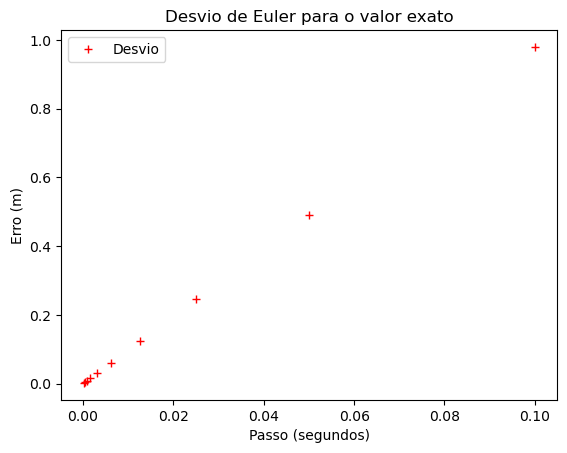

In [20]:
def eulerIntegration(dt):
    # Parâmetros
    t0 = 0
    tf = 3.0
    y0 = 0
    vy0 = 0

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int((tf-t0) / dt + 0.1)

    y = np.zeros(n + 1)
    vy = np.zeros(n + 1)

    # Insert initial values
    vy[0] = vy0
    y[0] = y0

    for i in range(n):
        y[i + 1] = y[i] + vy[i] * dt
        vy[i + 1] = vy[i] + g * dt
        
    target = 2
    targetIdx = int(np.ceil(target / dt))

    return y[targetIdx]

# Criamos uma lista de passos que são metade do passo anterior
dtX = np.array([0.1/2**k for k in range(10)])
eulerY = np.array(list(map(eulerIntegration, dtX)))

plt.plot(dtX, np.abs(eulerY - 1/2 * g * 2**2), "r+", label="Desvio")
plt.xlabel("Passo (segundos)")
plt.ylabel("Erro (m)")
plt.legend(loc="upper left")
plt.title("Desvio de Euler para o valor exato")
plt.show()

Neste caso consideramos apenas passos que são metade do passo anterior considerado, isto é necessário pois para outros valores pode ocorrer o problema de o valor que queremos considerar (neste caso 2s) estar mais perto ou mais longe do tempo que foi aproximado, o que incorre um erro extra dependendo da distância entre estes, o que nos não é relevante para este exercício.

Dado isto podemos observar que a relação entre o desvio e o passo é linear.

# Exercício 2

Uma bola é lançada verticalmente para cima com a velocidade 10 m/s.

a) Encontre analiticamente a lei do movimento $y = y(t)$, se não considerar a
resistência do ar.

Se não considerarmos a resistência do ar, então a aceleração será a aceleração gravítica ($g = 9.8 \, \left(m/s^2\right)$), o que implica um movimento uniformemente acelerado ou seja podemos utilizar a seguinte fórmula para calcular a distância.

$$
y(t) = y_0 + v_0 t + \frac{1}{2} a t^2
$$

Substituindo as variáveis e assumindo o posição inicial no zero:

$$
y(t) = 10 t - 4.9 t^2
$$

b) Qual a altura máxima e o instante em que ocorre, no caso da alínea a)?

Para determinarmos a altura máxima da bola precisamos de determinar o instante em que a velocidade desta tornou-se nula, pois é nesta ponto em que esta parou de avançar para cima e começou a cair.

A velocidade é dada por $v(t) = 10 - 9.8t$ logo basta resolver a equação $v(t) = 0$

$$
v(t) = 0
\Leftrightarrow 10 - 9.8t = 0
\Leftrightarrow 10 = 9.8t
\Leftrightarrow t = \frac{50}{49} \approx 1.02040816 \, \text{s}
$$

Ou seja a bola atingiu a sua altura máxima em $t = \frac{50}{49}$, aplicando este valor na lei do movimento da alínea a), obtemos:

$$
y \left( \frac{50}{49} \right)
= 10 \times \frac{50}{49} - 4.9 \left( \frac{50}{49} \right)^2
= \frac{250}{49} \approx 5.10204082 \, \text{m}
$$

c) Em que instante volta a passar pela posição inicial, no caso da alínea a)?

A bola passa na posição inicial quando quando se verifica a equação $y(t) = 0$, logo se determinarmos os valores de $t$ e considerarmos o segundo (visto que o primeiro será quando a bola é lançada inicialmente), este será o instante em que a bola volta a passar pela posição inicial.

$$
\begin{align*}
y(t) = 0 &\Leftrightarrow 10 t - 4.9 t^2 = 0 \\
&\Leftrightarrow t = \frac{ -10 \pm \sqrt{10^2} }{-9.8} \\
&\Leftrightarrow t = \frac{ -10 \pm 10 }{-9.8} \\
&\Leftrightarrow t = 0 \vee t = \frac{ -20 }{-9.8} \\
&\Leftrightarrow t = 0 \vee t = \frac{100}{49} \approx 2.04081633
\end{align*}
$$

d) Resolva as alíneas anteriores, considerando a resistência do ar. Resolva usando
o método de Euler. A velocidade terminal da bola no ar é de 100 km/h.

Vamos utilizar o método de Euler com duas integrações, uma para integrar a aceleração e obter a velocidade e outra para integrar a velocidade para obter a posição. A aceleração com resistência do ar aparece num dos slides teóricos como:

$$
a(t) = g - \frac{g}{v^2_T} v \lvert v \rvert
$$

No entanto este slide assume que a posição se encontra invertida (a gravidade é positiva), no entanto no nosso exercício estamos a considerar a aceleração como negativa, logo temos de negar $g$.

$$
a(t) = -g - \frac{g}{v^2_T} v \lvert v \rvert
$$

(Como a nossa velocidade também têm o sentido invertido o sinal da velocidade e da gravidade cancelam-se, mantendo o sinal da subtração no atrito)

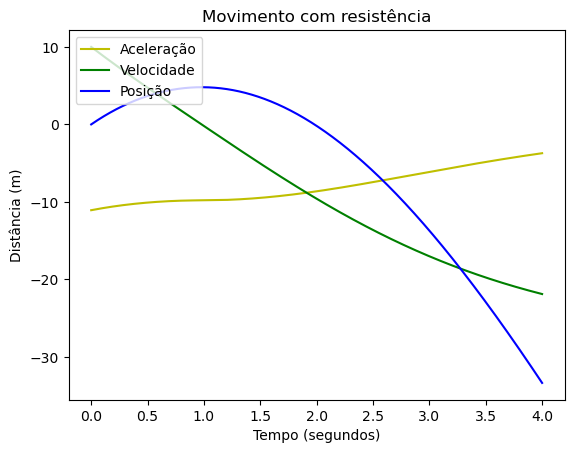

In [59]:
vT = 100 * (1000/3600)

# Parâmetros
dt = 0.001
t0 = 0
tf = 4.0
y0 = 0
vy0 = 10

def accel(v):
    return -g - (g/(vT**2) * v * np.abs(v))

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1)
y = np.zeros(n + 1)
vy = np.zeros(n + 1)
ay = np.zeros(n + 1)

# Insert initial values
vy[0] = vy0
t[0] = t0
y[0] = y0
ay[0] = accel(vy0)

for i in range(n):
    ay[i + 1] = accel(vy[i])
    vy[i + 1] = vy[i] + ay[i] * dt
    y[i + 1] = y[i] + vy[i] * dt
    t[i + 1] = t[i] + dt

plt.plot(t, ay, "y", label="Aceleração")
plt.plot(t, vy, "g", label="Velocidade")
plt.plot(t, y, "b", label="Posição")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Movimento com resistência")
plt.show()

d.b) Qual a altura máxima e o instante em que ocorre, no caso da alínea d)?

Basta utilizarmos o método `argmax` do `numpy` que permite obter o indíce do maior item do array, se aplicarmos este ao array das posições $y$ obtemos o indíce que se utilizarmos outra vez a $y$ obtemos a altura máxima, se aplicarmos no array do tempo $t$ obtemos o instante em que está altura é atingida.

In [51]:
idx = y.argmax()
yMax = y[idx]
tMax = t[idx]

In [52]:
display(Math(r'y_{{ \text{{max}} }} = {:.8f}'.format(yMax)))
display(Math(r't_{{ \text{{max}} }} = {:.8f}'.format(tMax)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

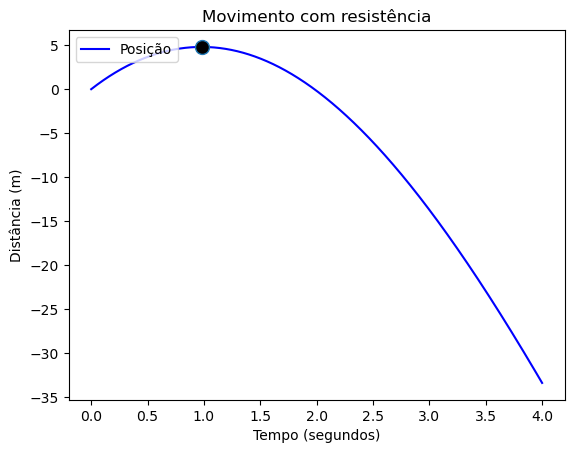

In [53]:
plt.plot(t, y, "b", label="Posição")
plt.plot(
    tMax,
    yMax,
    marker="o",
    markersize=10,
    markerfacecolor="black",
)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Movimento com resistência")
plt.show()

d.c) Em que instante volta a passar pela posição inicial, no caso da alínea d)?

Para encontrarmos a posição inicial podemos utilizar o método `np.where` que devolve todos os índices dos elementos que cumprem a condição passada, e como condição utilizamos o método `np.isclose` que diz se um valor `a` (1° argumento) está perto de um valor de referência `b` (2° argumento). Necessitamos deste metódo em vez de comparar diretamente pois os erros de aproximação do método do euler e dos floats podem causar o valor de não ser exatamente igual a zero.

In [62]:
idxs = np.where(np.isclose(y, 0, atol=0.005))[0]
# Queremos o segundo elemento pois o primeiro corresponde ao momento
# de lançamento inicial.
idx = idxs[1]
yRet = y[idx]
tRet = t[idx]

In [65]:
display(Math(r'y_{{ \text{{ret}} }} = {:.8f}'.format(yRet)))
display(Math(r't_{{ \text{{ret}} }} = {:.8f}'.format(tRet)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

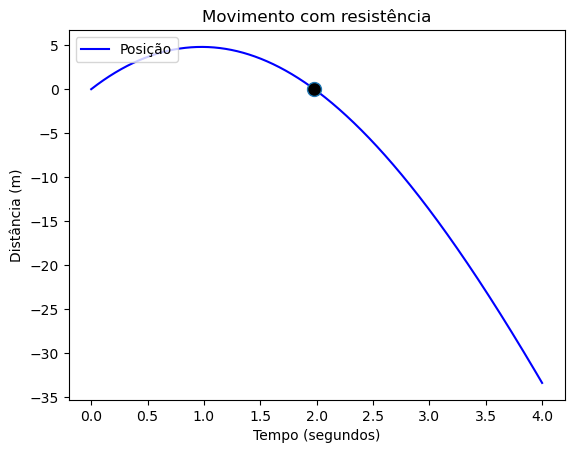

In [67]:
plt.plot(t, y, "b", label="Posição")
plt.plot(
    tRet,
    yRet,
    marker="o",
    markersize=10,
    markerfacecolor="black",
)
plt.xlabel("Tempo (segundos)")
plt.ylabel("Distância (m)")
plt.legend(loc="upper left")
plt.title("Movimento com resistência")
plt.show()